#TMRCA Sample#
##Compare TMRCA for different scenariors to look at how unusal result is##

In [1]:
#this uses iPython magic to make plots appear inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import numpy as np

import pandas as pd
import scipy.misc

import getpass
import os
from __future__ import division

# since computers have different users...
userName = getpass.getuser()
#dropBoxDir = '/Users/' + ''userName'' + '/Dropbox'
#change to that dir
#dbDataDir = dropBoxDir + '/jeffs-docs/projects/primates/consortium/2013-samples-JK/chimp-chrY/tmrca'
#os.chdir(dbDataDir)
print 'User name is:', userName
print 'Current working dir is:\n',os.getcwd()

User name is: moetjens
Current working dir is:
/Users/moetjens/Desktop


In [2]:
# setup functions for getting tmrca values

def tmrca_k(Ne,k):
    '''returns a sample tmrca for k lineages with populaiton size Ne
       value is in generations
    '''
    tmrca = 0
    for i in range(2,k+1):
        lambda_i = scipy.misc.comb(i,2,exact=True)  #get the scale param
        beta = 1.0/lambda_i
        t = np.random.exponential(beta)
        tmrca += t
    tmrca = tmrca * Ne
    return tmrca

def tmrca_2(Ne):
    '''return a sample tmrca for special case of 2 lineages drawn from 
       population of size Ne.  Value is in generations'''    
    tmrca = np.random.exponential(1.0) * Ne
    return tmrca
    

#Returns effective Y chromosomes and Mito (in that order)
def effectiveChroms(R, Nauto):
    '''returns number of effective Y and Mito chroms for given R'''
    Nf = Nauto*(1 + R)/(4*R)
    Nm = Nf*R
    NchrY = Nm/2
    Nmito = Nf/2
    return NchrY,Nmito

#ex.
#chrY, mito  = effectiveChroms(0.5,56300)     
    
    

In [3]:
#setup samples to see that it is working
numDraws = 10000
Ne= 2*10000  # for diploid
t_100 = []
for i in xrange(numDraws):
    t_100.append(tmrca_k(10000,500))

In [4]:
# print stats
print 'For k = 100'
print np.mean(t_100),np.median(t_100),np.std(t_100)

For k = 100
19970.733598 17351.2504373 10704.5745472


In [5]:
#setup to make the poznik plot, Figure 3
numDraws = 100000

baka_ne = 1800
baka_g = 31.5/1000 # convert to kya
baka_tmrca = []
for i in xrange(numDraws):
    baka_tmrca.append(tmrca_k(baka_ne,100)*baka_g)
    
mbuti_ne = 3700
mbuti_g = 26.5/1000 # convert to kya
mbuti_tmrca = []
for i in xrange(numDraws):
    mbuti_tmrca.append(tmrca_k(mbuti_ne,100)*mbuti_g)
   
    
    

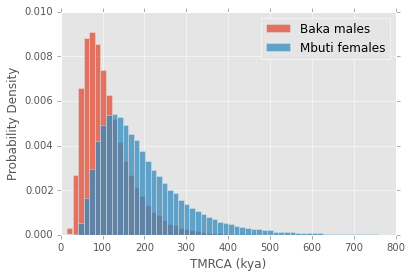

In [6]:
# make plot
poznikDF = pd.DataFrame({'Baka males': baka_tmrca, 'Mbuti females': mbuti_tmrca})


myPlot = poznikDF.plot(kind='hist', bins=100,xlim=[0,800],
                     alpha=0.75, normed = True)

myPlot.set_xlabel('TMRCA (kya)')
myPlot.set_ylabel('Probability Density')


In [7]:
print '2',tmrca_2(1000)
print '2k',tmrca_k(1000,2)

2 937.240339869
2k 1123.40086944


In [8]:
numDraws = 100000

Ne = 10000
g = 30/1000.0

test2 = []
testk = []
for i in xrange(numDraws):
    testk.append(tmrca_k(Ne,100)*g)
    test2.append(tmrca_2(Ne)*g)

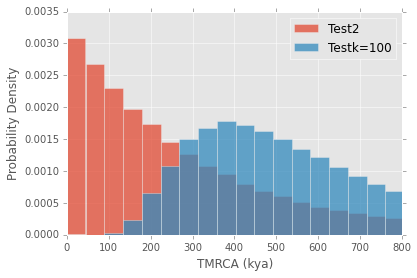

In [9]:
# make plot
test2DF = pd.DataFrame({'Test2': test2, 'Testk=100': testk})


myPlot = test2DF.plot(kind='hist', bins=100,xlim=[0,800],
                     alpha=0.75, normed = True)

myPlot.set_xlabel('TMRCA (kya)')
myPlot.set_ylabel('Probability Density')


In [10]:
test2DF.describe ()

,Test2,Testk=100
count,100000.000000,100000.000000
mean,300.181175,595.347919
std,299.942301,322.164518
min,0.001275,92.054345
25%,86.535486,368.751458
50%,207.737509,517.736924
75%,416.018988,737.092787
max,4316.569937,4475.996068


In [11]:
r = 1.0
y,m = effectiveChroms(r,10000)
print r,y,m

r = 0.5
y,m = effectiveChroms(r,10000)
print r,y,m


1.0 2500.0 2500.0
0.5 1875.0 3750.0


In [12]:
numDraws = 100000

Ne = 10600

g = 25/1000.

rVals = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,1]
NeVals = {}
differences = {}
for r in rVals:
    y,m = effectiveChroms(r,Ne)
    NeVals[r] = [y,m]
    differences[r] = []

# setup the lists
for i in xrange(numDraws):
    for r in rVals:
        ytmrca = tmrca_2(NeVals[r][0])*g
        mtmrca = tmrca_2(NeVals[r][1])*g
        d = mtmrca-ytmrca
        differences[r].append(d)
        



In [13]:
# make plot
diffDF = pd.DataFrame(differences)

diffDF.describe()

,0.01,0.05,0.1,0.2,0.3,0.4,0.5,1.0
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,3299.683075,657.308103,328.609655,158.357245,100.800394,69.513548,49.727982,0.358332
std,3335.666390,694.940923,368.359134,201.968719,150.750000,125.697006,111.380407,93.787105
min,-293.394805,-311.007497,-383.787223,-383.537836,-422.118879,-626.110712,-463.760162,-744.831816
25%,923.411820,164.044276,69.836240,20.719429,3.837273,-6.375473,-14.375814,-45.617725
50%,2273.543042,444.888213,218.220458,101.303712,62.074869,41.105968,28.626729,0.049153
75%,4581.473632,925.898808,469.973242,238.181492,161.281171,121.125119,97.641499,46.121921
max,40773.381895,8053.329157,4354.844413,2464.211893,1720.426451,1230.864060,1232.810326,757.584952


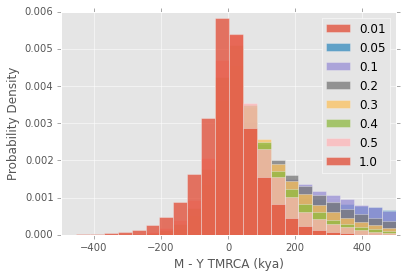

In [14]:
diffPlot = diffDF.plot(kind='hist',bins=1000,xlim=[-500,500],
                     alpha=0.75, normed = True)

diffPlot.set_xlabel('M - Y TMRCA (kya)')
diffPlot.set_ylabel('Probability Density')

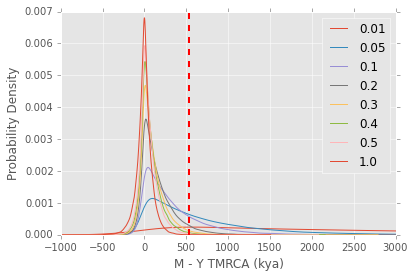

In [15]:
obsDiff = 529  #observed difference 529 ky

diffPlot = diffDF.plot(kind='kde',
                     xlim=[-1000,3000])


plt.axvline(x=obsDiff, linewidth=2, color='red',linestyle='--')

diffPlot.set_xlabel('M - Y TMRCA (kya)')
diffPlot.set_ylabel('Probability Density')

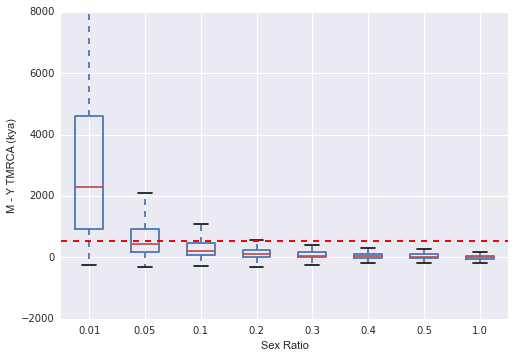

In [32]:

diffPlot = diffDF.plot(kind='box')


plt.axhline(y=obsDiff, linewidth=2, color='red',linestyle='--')

diffPlot.set_ylim([-2000,8000])
diffPlot.set_ylabel('M - Y TMRCA (kya)')
diffPlot.set_xlabel('Sex Ratio')




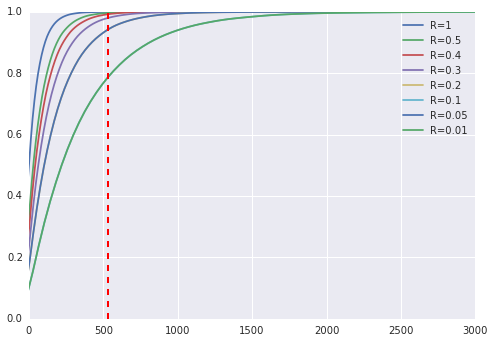

In [17]:
#!pip install seaborn

import seaborn as sns
sns.set(color_codes=True)

obsDiff = 529  #observed difference 529 ky



sns.kdeplot(np.array(differences[1]),cumulative=True,label='R=1')
sns.kdeplot(np.array(differences[0.5]),cumulative=True,label='R=0.5')
sns.kdeplot(np.array(differences[0.4]),cumulative=True,label='R=0.4')
sns.kdeplot(np.array(differences[0.3]),cumulative=True,label='R=0.3')
sns.kdeplot(np.array(differences[0.2]),cumulative=True,label='R=0.2')
sns.kdeplot(np.array(differences[0.1]),cumulative=True,label='R=0.1')
sns.kdeplot(np.array(differences[0.2]),cumulative=True,label='R=0.05')
sns.kdeplot(np.array(differences[0.1]),cumulative=True,label='R=0.01')


plt.xlim([0,3000])
plt.axvline(x=obsDiff, linewidth=2, color='red',linestyle='--')

diffPlot.set_xlabel('M / Y TMRCA (kya)')
diffPlot.set_ylabel('Cumulative Fraction')

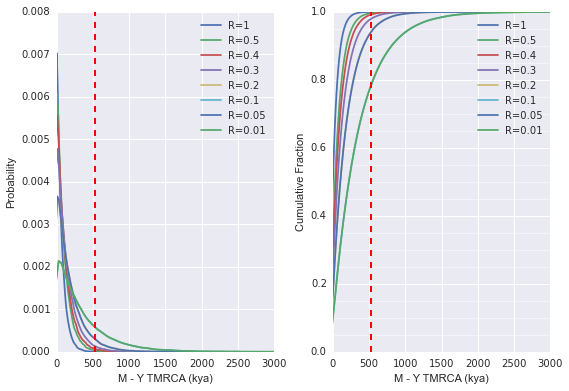

In [18]:
obsDiff = 529  #observed difference 529 ky
# Set up the matplotlib figure
ax = plt.subplot(1,2,1)

sns.kdeplot(np.array(differences[1]),cumulative=False,label='R=1',ax=ax)
sns.kdeplot(np.array(differences[0.5]),cumulative=False,label='R=0.5',ax=ax)
sns.kdeplot(np.array(differences[0.4]),cumulative=False,label='R=0.4',ax=ax)
sns.kdeplot(np.array(differences[0.3]),cumulative=False,label='R=0.3',ax=ax)
sns.kdeplot(np.array(differences[0.2]),cumulative=False,label='R=0.2',ax=ax)
sns.kdeplot(np.array(differences[0.1]),cumulative=False,label='R=0.1',ax=ax)
sns.kdeplot(np.array(differences[0.2]),cumulative=False,label='R=0.05',ax=ax)
sns.kdeplot(np.array(differences[0.1]),cumulative=False,label='R=0.01',ax=ax)


plt.xlim([0,3000])
plt.axvline(x=obsDiff, linewidth=2, color='red',linestyle='--')
ax.set_xlabel('M - Y TMRCA (kya)')
ax.set_ylabel('Probability')


ax = plt.subplot(1,2,2)

sns.kdeplot(np.array(differences[1]),cumulative=True,label='R=1')
sns.kdeplot(np.array(differences[0.5]),cumulative=True,label='R=0.5')
sns.kdeplot(np.array(differences[0.4]),cumulative=True,label='R=0.4')
sns.kdeplot(np.array(differences[0.3]),cumulative=True,label='R=0.3')
sns.kdeplot(np.array(differences[0.2]),cumulative=True,label='R=0.2')
sns.kdeplot(np.array(differences[0.1]),cumulative=True,label='R=0.1')
sns.kdeplot(np.array(differences[0.2]),cumulative=True,label='R=0.05')
sns.kdeplot(np.array(differences[0.1]),cumulative=True,label='R=0.01')


plt.xlim([0,3000])
plt.axvline(x=obsDiff, linewidth=2, color='red',linestyle='--')

yticks = range(0,101,10)
yticks = [j/100.0 for j in yticks]

ysubticks = range(5,101,10)
ysubticks = [j/100.0 for j in ysubticks]

#ax.tick_params(axis = 'both', which = 'major', labelsize = 6)
#ax.tick_params(which = 'minor', labelsize = 0)


#ax.set_yticks(yticks)
#ax.set_yticks(ysubticks,minor=True)
#ax.set_ysubticks(subticks)

ax.get_yaxis().set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

#ax.yaxis.grid(True, which="minor")
ax.set_xlabel('M - Y TMRCA (kya)')
ax.set_ylabel('Cumulative Fraction')

plt.tight_layout()



In [21]:
print 'Observed Difference is %i ky' % obsDiff
for r in rVals:
    numGE = 0
    for d in differences[r]:
        if d >= obsDiff:
            numGE +=1
    frac = float(numGE)/float(numDraws)
    frac = frac * 100.0
    print 'For R = %.2f, %.4f percent are greater than %i ky'  % (r,frac,obsDiff)

Observed Difference is 529 ky
For R = 0.01, 84.4580 percent are greater than 529 ky
For R = 0.05, 44.2060 percent are greater than 529 ky
For R = 0.10, 21.2860 percent are greater than 529 ky
For R = 0.20, 5.7800 percent are greater than 529 ky
For R = 0.30, 2.0020 percent are greater than 529 ky
For R = 0.40, 0.7680 percent are greater than 529 ky
For R = 0.50, 0.3480 percent are greater than 529 ky
For R = 1.00, 0.0180 percent are greater than 529 ky


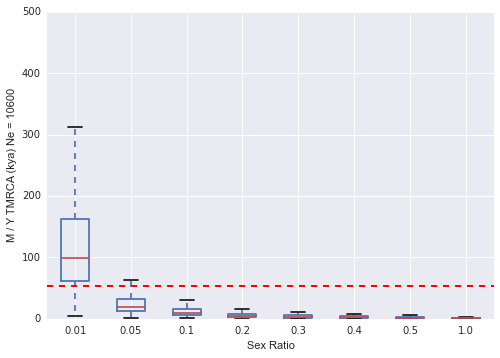

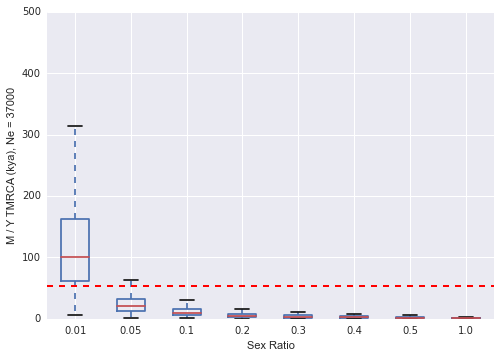

In [22]:
numDraws = 100000

Ne = 10600

g = 25/1000.

rVals = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,1]
NeVals = {}
ratio = {}
for r in rVals:
    y,m = effectiveChroms(r,Ne)
    NeVals[r] = [y,m]
    ratio[r] = []

# setup the lists
for i in xrange(numDraws):
    for r in rVals:
        ytmrca = tmrca_k((NeVals[r][0]),100)*baka_g
        mtmrca = tmrca_k((NeVals[r][1]),100)*baka_g
        d = mtmrca/ytmrca
        ratio[r].append(d)

# make plot

ratioDF = pd.DataFrame(ratio)
#ratioDF.describe()

ratioPlot1 = ratioDF.plot(kind='box')
obsRatio = 53.9

plt.axhline(y=obsRatio, linewidth=2, color='red',linestyle='--')

ratioPlot1.set_ylim([-0,500])
ratioPlot1.set_ylabel('M / Y TMRCA (kya) Ne = 10600')
ratioPlot1.set_xlabel('Sex Ratio')


numDraws = 100000

Ne = 37000

g = 25/1000.

rVals = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,1]
NeVals = {}
ratio = {}
for r in rVals:
    y,m = effectiveChroms(r,Ne)
    NeVals[r] = [y,m]
    ratio[r] = []

# setup the lists
for i in xrange(numDraws):
    for r in rVals:
        ytmrca = tmrca_k((NeVals[r][0]),100)*baka_g
        mtmrca = tmrca_k((NeVals[r][1]),100)*baka_g
        d = mtmrca/ytmrca
        ratio[r].append(d)

# make plot

ratioDF = pd.DataFrame(ratio)
#ratioDF.describe()

ratioPlot2 = ratioDF.plot(kind='box')
obsRatio = 53.9

plt.axhline(y=obsRatio, linewidth=2, color='red',linestyle='--')

ratioPlot2.set_ylim([-0,500])
ratioPlot2.set_ylabel('M / Y TMRCA (kya), Ne = 37000')
ratioPlot2.set_xlabel('Sex Ratio')

In [23]:
print 'Observed Difference is %i ky' % obsDiff
for r in rVals:
    numGE = 0
    for d in differences[r]:
        if d >= obsDiff:
            numGE +=1
    frac = float(numGE)/float(numDraws)
    frac = frac * 100.0
    print 'For R = %.2f, %.4f percent are greater than %i ky'  % (r,frac,obsDiff)

Observed Difference is 529 ky
For R = 0.01, 84.4580 percent are greater than 529 ky
For R = 0.05, 44.2060 percent are greater than 529 ky
For R = 0.10, 21.2860 percent are greater than 529 ky
For R = 0.20, 5.7800 percent are greater than 529 ky
For R = 0.30, 2.0020 percent are greater than 529 ky
For R = 0.40, 0.7680 percent are greater than 529 ky
For R = 0.50, 0.3480 percent are greater than 529 ky
For R = 1.00, 0.0180 percent are greater than 529 ky


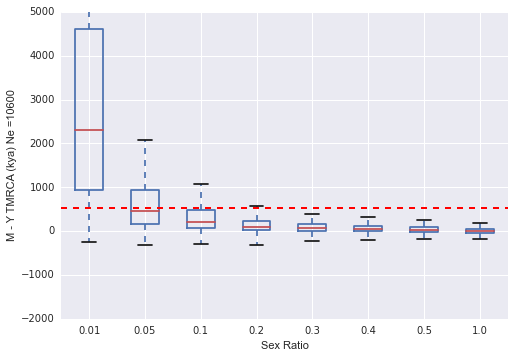

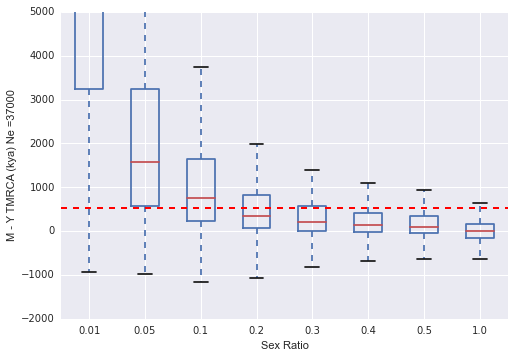

In [24]:
#test to see the effect of different Ne values when using the difference
numDraws = 100000

Ne = 10600

g = 25/1000.

rVals = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,1]
NeVals = {}
differences10K = {}
for r in rVals:
    y,m = effectiveChroms(r,Ne)
    NeVals[r] = [y,m]
    differences10K[r] = []

# setup the lists
for i in xrange(numDraws):
    for r in rVals:
        ytmrca = tmrca_2(NeVals[r][0])*g
        mtmrca = tmrca_2(NeVals[r][1])*g
        d = mtmrca-ytmrca
        differences10K[r].append(d)
        
diffDF = pd.DataFrame(differences10K)
diffPlot1 = diffDF.plot(kind='box')


plt.axhline(y=obsDiff, linewidth=2, color='red',linestyle='--')

diffPlot1.set_ylim([-2000,5000])
diffPlot1.set_ylabel('M - Y TMRCA (kya) Ne =10600')
diffPlot1.set_xlabel('Sex Ratio')


#test to see the effect of different Ne values
numDraws = 100000

Ne = 37000

g = 25/1000.

rVals = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,1]
NeVals = {}
differences37K = {}
for r in rVals:
    y,m = effectiveChroms(r,Ne)
    NeVals[r] = [y,m]
    differences37K[r] = []

# setup the lists
for i in xrange(numDraws):
    for r in rVals:
        ytmrca = tmrca_2(NeVals[r][0])*g
        mtmrca = tmrca_2(NeVals[r][1])*g
        d = mtmrca-ytmrca
        differences37K[r].append(d)

diffDF = pd.DataFrame(differences37K)
diffPlot = diffDF.plot(kind='box')

plt.axhline(y=obsDiff, linewidth=2, color='red',linestyle='--')

diffPlot.set_ylim([-2000,5000])
diffPlot.set_ylabel('M - Y TMRCA (kya) Ne =37000')
diffPlot.set_xlabel('Sex Ratio')

In [25]:
print 'Observed Difference is %i ky, Ne= 10600' % obsDiff
for r in rVals:
    numGE = 0
    for d in differences10K[r]:
        if d >= obsDiff:
            numGE +=1
    frac = float(numGE)/float(numDraws)
    frac = frac * 100.0
    print 'For R = %.2f, %.4f percent are greater than %i ky'  % (r,frac,obsDiff)
    
print '\nObserved Difference is %i ky, Ne= 37000' % obsDiff
for r in rVals:
    numGE = 0
    for d in differences37K[r]:
        if d >= obsDiff:
            numGE +=1
    frac = float(numGE)/float(numDraws)
    frac = frac * 100.0
    print 'For R = %.2f, %.4f percent are greater than %i ky'  % (r,frac,obsDiff)   

Observed Difference is 529 ky, Ne= 10600
For R = 0.01, 84.5510 percent are greater than 529 ky
For R = 0.05, 44.5780 percent are greater than 529 ky
For R = 0.10, 21.3530 percent are greater than 529 ky
For R = 0.20, 5.8180 percent are greater than 529 ky
For R = 0.30, 1.9620 percent are greater than 529 ky
For R = 0.40, 0.7090 percent are greater than 529 ky
For R = 0.50, 0.3320 percent are greater than 529 ky
For R = 1.00, 0.0220 percent are greater than 529 ky

Observed Difference is 529 ky, Ne= 37000
For R = 0.01, 94.6390 percent are greater than 529 ky
For R = 0.05, 76.6950 percent are greater than 529 ky
For R = 0.10, 59.8590 percent are greater than 529 ky
For R = 0.20, 38.9380 percent are greater than 529 ky
For R = 0.30, 26.8080 percent are greater than 529 ky
For R = 0.40, 19.3120 percent are greater than 529 ky
For R = 0.50, 14.5830 percent are greater than 529 ky
For R = 1.00, 5.0300 percent are greater than 529 ky


In [26]:
print 'Observed Difference is %i ky' % obsRatio
for r in rVals:
    numGE = 0
    for d in ratio[r]:
        if d >= obsRatio:
            numGE +=1
    frac = float(numGE)/float(numDraws)
    frac = frac * 100.0
    print 'For R = %.2f, %.4f percent are greater than %i ky'  % (r,frac,obsRatio)

Observed Difference is 53 ky
For R = 0.01, 80.4650 percent are greater than 53 ky
For R = 0.05, 8.3580 percent are greater than 53 ky
For R = 0.10, 0.8460 percent are greater than 53 ky
For R = 0.20, 0.0240 percent are greater than 53 ky
For R = 0.30, 0.0010 percent are greater than 53 ky
For R = 0.40, 0.0000 percent are greater than 53 ky
For R = 0.50, 0.0000 percent are greater than 53 ky
For R = 1.00, 0.0000 percent are greater than 53 ky


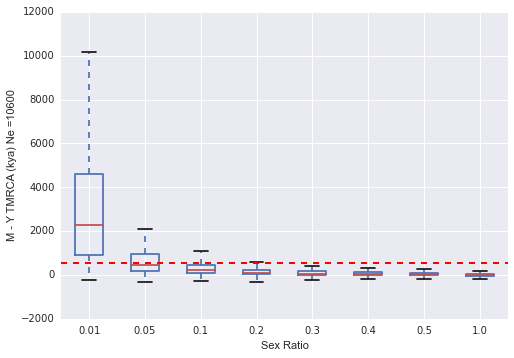

In [30]:
diffDF = pd.DataFrame(differences10K)
diffPlot1 = diffDF.plot(kind='box')


plt.axhline(y=obsDiff, linewidth=2, color='red',linestyle='--')

diffPlot1.set_ylim([-2000,12000])
diffPlot1.set_ylabel('M - Y TMRCA (kya) Ne =10600')
diffPlot1.set_xlabel('Sex Ratio')
